# 0. Pr√©sentation  

## Pr√©diction du Churn Client dans le Secteur des T√©l√©communications

### Introduction

Dans un secteur des t√©l√©communications hautement concurrentiel, **la fid√©lisation des clients est devenue un enjeu strat√©gique majeur**. La perte de clients, ou *churn*, repr√©sente non seulement un manque √† gagner direct, mais √©galement un co√ªt indirect li√© √† l‚Äôacquisition de nouveaux abonn√©s. Face √† cette r√©alit√©, les entreprises cherchent √† anticiper les risques de r√©siliation pour d√©ployer des actions de r√©tention cibl√©es.

Ce projet vise √† d√©velopper un **mod√®le de machine learning capable de pr√©dire avec fiabilit√© les clients susceptibles de r√©silier leur abonnement**, en s‚Äôappuyant sur des donn√©es comportementales, contractuelles et d√©mographiques issues du jeu de donn√©es **Telco Customer Churn**.
L‚Äôobjectif est de maximiser la capacit√© de d√©tection des clients √† risque tout en minimisant les erreurs qui pourraient conduire √† des interventions inutiles sur des clients fid√®les.


### **Bonne lecture**
___ 
- Lien 
    - Donn√©es : "https://www.kaggle.com/datasets/blastchar/telco-customer-churn"
    - Profil Github : "https://github.com/ange2219"
    - Profil Kaggle : "https://www.kaggle.com/angedahou"
  

# 1. Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# 2. Chargement des donn√©es 

In [2]:
data = pd.read_csv('Telco_Customer_Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2.1. Description de la base de donn√©es " Telco_Customer_Churn "

La base de donn√©es " Telco_Customer_Churn " contient des donn√©es sur 

Les caract√©ristiques (variables explicatives) enregistr√©es pour chaque client sont les suivantes :


| Variable                   | Signification           |
|----------------------------|-------------------------|
|customerID                  | ID_Client
|gender                     | Sexe
|SeniorCitizen  |  Senior |
|Partner |Partenaire|
|Dependents | Personnes_√†_charge | 
|tenure | Anciennet√© | 
|PhoneService | T√©l√©phone |
|MultipleLines'|  Lignes_multiples|
|InternetService|Type_Internet|
|OnlineSecurity|S√©curit√©_Internet|
|OnlineBackup|Sauvegarde_En_Ligne|
|DeviceProtection|Protection_Appareils| 
|TechSupport |Assistance_Technique|
|StreamingTV |Streaming_TV|
|StreamingMovies|Streaming_Films|
|Contract|Type_Contrat|
|PaperlessBilling|Facture_√âlectronique|
|PaymentMethod|Mode_Paiement|
|MonthlyCharges|Facture_Mensuelle|
|TotalCharges|Total_Factur√©|
|Churn|   R√©siliation|




La variable cible est :
- Churn 


La base de donn√©es contient 7034 entr√©es (lignes) et 21 caract√©ristiques (colonnes).

In [5]:
# Renommer les colonnes
data.rename(columns={
    'customerID': 'ID', 
    'gender': 'sexe', 
    'SeniorCitizen': 'personne_age', 
    'Partner': 'partenaire', 
    'Dependents': 'personnes_√†_charge', 
    'tenure': 'anciennet√©', 
    'PhoneService': 't√©l√©phone', 
    'MultipleLines': 'lignes_multiples', 
    'InternetService': 'type_internet', 
    'OnlineSecurity': 's√©curit√©_internet', 
    'OnlineBackup': 'sauvegarde_en_ligne', 
    'DeviceProtection': 'protection_appareils', 
    'TechSupport': 'assistance_technique', 
    'StreamingTV': 'streaming_TV', 
    'StreamingMovies': 'streaming_films', 
    'Contract': 'type_contrat', 
    'PaperlessBilling': 'facture_electronique', 
    'PaymentMethod': 'mode_paiement', 
    'MonthlyCharges': 'facture_mensuelle', 
    'TotalCharges': 'total_factur√©', 
    'Churn': 'resiliation' 
}, inplace=True)

# Afficher les noms de colonnes mis √† jour
print(data.columns)

Index(['ID', 'sexe', 'personne_age', 'partenaire', 'personnes_√†_charge',
       'anciennet√©', 't√©l√©phone', 'lignes_multiples', 'type_internet',
       's√©curit√©_internet', 'sauvegarde_en_ligne', 'protection_appareils',
       'assistance_technique', 'streaming_TV', 'streaming_films',
       'type_contrat', 'facture_electronique', 'mode_paiement',
       'facture_mensuelle', 'total_factur√©', 'resiliation'],
      dtype='object')


In [6]:
for col in data.select_dtypes('object').drop('ID', axis = 1):
    print(f"{col}")
    print(data[col].unique())

sexe
['Female' 'Male']
partenaire
['Yes' 'No']
personnes_√†_charge
['No' 'Yes']
t√©l√©phone
['No' 'Yes']
lignes_multiples
['No phone service' 'No' 'Yes']
type_internet
['DSL' 'Fiber optic' 'No']
s√©curit√©_internet
['No' 'Yes' 'No internet service']
sauvegarde_en_ligne
['Yes' 'No' 'No internet service']
protection_appareils
['No' 'Yes' 'No internet service']
assistance_technique
['No' 'Yes' 'No internet service']
streaming_TV
['No' 'Yes' 'No internet service']
streaming_films
['No' 'Yes' 'No internet service']
type_contrat
['Month-to-month' 'One year' 'Two year']
facture_electronique
['Yes' 'No']
mode_paiement
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
total_factur√©
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
resiliation
['No' 'Yes']


In [7]:
data['sexe'] = data['sexe'].replace({'Female' : 'Femme', 'Male' : 'Homme'})
data['lignes_multiples'] = data['lignes_multiples'].replace({'No phone service' : 'Pas de service tel'})
data['type_internet'] = data['type_internet'].replace({'Fiber optic' : 'Fibre optique'})
data['s√©curit√©_internet'] = data['s√©curit√©_internet'].replace({'No internet service' : 'Pas de service net'})
data['sauvegarde_en_ligne'] = data['sauvegarde_en_ligne'].replace({'No internet service' : 'Pas de service net'})
data['protection_appareils'] = data['protection_appareils'].replace({'No internet service' : 'Pas de service net'})
data['assistance_technique'] = data['assistance_technique'].replace({'No internet service' : 'Pas de service net'})
data['streaming_TV'] = data['streaming_TV'].replace({'No internet service' : 'Pas de service net'})
data['streaming_films'] = data['streaming_films'].replace({'No internet service' : 'Pas de service net'})
data['type_contrat'] = data['type_contrat'].replace({'Month-to-month' : 'Mensuel', 'One year' : 'Annuel', 'Two year': 'Deux ans'})
data['mode_paiement'] = data['mode_paiement'].replace({'Electronic check' : 'Cheque electronique', 'Mailed check' : 'Cheque papier', 'Bank transfer (automatic)': 'Transfere bancaire (auto)', 'Credit card (automatic)': 'Carte de credit (auto)'})


In [8]:
for col in data.select_dtypes('object').drop('ID', axis = 1):
    print(f"{col}")
    print(data[col].unique())

sexe
['Femme' 'Homme']
partenaire
['Yes' 'No']
personnes_√†_charge
['No' 'Yes']
t√©l√©phone
['No' 'Yes']
lignes_multiples
['Pas de service tel' 'No' 'Yes']
type_internet
['DSL' 'Fibre optique' 'No']
s√©curit√©_internet
['No' 'Yes' 'Pas de service net']
sauvegarde_en_ligne
['Yes' 'No' 'Pas de service net']
protection_appareils
['No' 'Yes' 'Pas de service net']
assistance_technique
['No' 'Yes' 'Pas de service net']
streaming_TV
['No' 'Yes' 'Pas de service net']
streaming_films
['No' 'Yes' 'Pas de service net']
type_contrat
['Mensuel' 'Annuel' 'Deux ans']
facture_electronique
['Yes' 'No']
mode_paiement
['Cheque electronique' 'Cheque papier' 'Transfere bancaire (auto)'
 'Carte de credit (auto)']
total_factur√©
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
resiliation
['No' 'Yes']


## 2.2. Qualit√© des donn√©es

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7043 non-null   object 
 1   sexe                  7043 non-null   object 
 2   personne_age          7043 non-null   int64  
 3   partenaire            7043 non-null   object 
 4   personnes_√†_charge    7043 non-null   object 
 5   anciennet√©            7043 non-null   int64  
 6   t√©l√©phone             7043 non-null   object 
 7   lignes_multiples      7043 non-null   object 
 8   type_internet         7043 non-null   object 
 9   s√©curit√©_internet     7043 non-null   object 
 10  sauvegarde_en_ligne   7043 non-null   object 
 11  protection_appareils  7043 non-null   object 
 12  assistance_technique  7043 non-null   object 
 13  streaming_TV          7043 non-null   object 
 14  streaming_films       7043 non-null   object 
 15  type_contrat   

In [10]:
data = data[data['total_factur√©']!= ' '] #Selectionner les lignes ou data['total_factur√©'] n'a pas de valeurs vides
data['total_factur√©'] = data['total_factur√©'].astype(float)

In [11]:
data.describe()

personne_age   anciennet√©  facture_mensuelle  total_factur√©
count   7032.000000  7032.000000        7032.000000    7032.000000
mean       0.162400    32.421786          64.798208    2283.300441
std        0.368844    24.545260          30.085974    2266.771362
min        0.000000     1.000000          18.250000      18.800000
25%        0.000000     9.000000          35.587500     401.450000
50%        0.000000    29.000000          70.350000    1397.475000
75%        0.000000    55.000000          89.862500    3794.737500
max        1.000000    72.000000         118.750000    8684.800000

In [12]:
data.isna().sum()

ID                      0
sexe                    0
personne_age            0
partenaire              0
personnes_√†_charge      0
anciennet√©              0
t√©l√©phone               0
lignes_multiples        0
type_internet           0
s√©curit√©_internet       0
sauvegarde_en_ligne     0
protection_appareils    0
assistance_technique    0
streaming_TV            0
streaming_films         0
type_contrat            0
facture_electronique    0
mode_paiement           0
facture_mensuelle       0
total_factur√©           0
resiliation             0
dtype: int64

# 3. Analyse Exploratoire de donn√©es (EDA)

In [13]:
df = data.copy()

In [14]:
df.head()

ID   sexe  personne_age partenaire personnes_√†_charge  anciennet√©  \
0  7590-VHVEG  Femme             0        Yes                 No           1   
1  5575-GNVDE  Homme             0         No                 No          34   
2  3668-QPYBK  Homme             0         No                 No           2   
3  7795-CFOCW  Homme             0         No                 No          45   
4  9237-HQITU  Femme             0         No                 No           2   

  t√©l√©phone    lignes_multiples  type_internet s√©curit√©_internet  ...  \
0        No  Pas de service tel            DSL                No  ...   
1       Yes                  No            DSL               Yes  ...   
2       Yes                  No            DSL               Yes  ...   
3        No  Pas de service tel            DSL               Yes  ...   
4       Yes                  No  Fibre optique                No  ...   

  protection_appareils assistance_technique streaming_TV streaming_films  \
0                   No                   No           No              No   
1                  Yes                   No           No              No   
2                   No                   No           No              No   
3                  Yes                  Yes           No              No   
4                   No                   No           No              No   

  type_contrat facture_electronique              mode_paiement  \
0      Mensuel                  Yes        Cheque electronique   
1       Annuel                   No              Cheque papier   
2      Mensuel                  Yes              Cheque papier   
3       Annuel                   No  Transfere bancaire (auto)   
4      Mensuel                  Yes        Cheque electronique   

  facture_mensuelle  total_factur√©  resiliation  
0             29.85          29.85           No  
1             56.95        1889.50           No  
2             53.85         108.15          Yes  
3             42.30        1840.75           No  
4             70.70         151.65          Yes  

[5 rows x 21 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7032 non-null   object 
 1   sexe                  7032 non-null   object 
 2   personne_age          7032 non-null   int64  
 3   partenaire            7032 non-null   object 
 4   personnes_√†_charge    7032 non-null   object 
 5   anciennet√©            7032 non-null   int64  
 6   t√©l√©phone             7032 non-null   object 
 7   lignes_multiples      7032 non-null   object 
 8   type_internet         7032 non-null   object 
 9   s√©curit√©_internet     7032 non-null   object 
 10  sauvegarde_en_ligne   7032 non-null   object 
 11  protection_appareils  7032 non-null   object 
 12  assistance_technique  7032 non-null   object 
 13  streaming_TV          7032 non-null   object 
 14  streaming_films       7032 non-null   object 
 15  type_contrat        

## 3.1. Analyse univari√©e

resiliation
No     5163
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='resiliation', ylabel='count'>

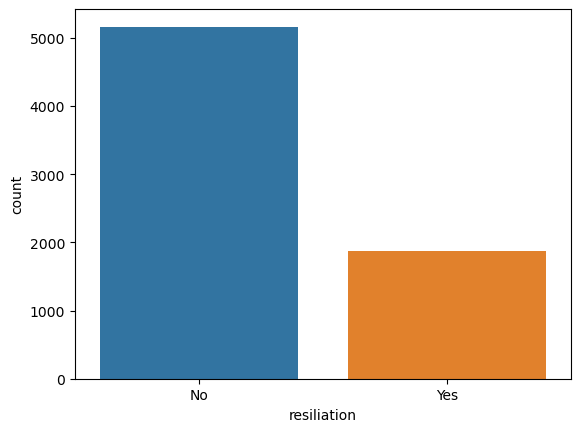

In [16]:
print(df['resiliation'].value_counts())
sns.countplot( x = df['resiliation'], hue = df['resiliation'], data = df)

In [17]:
var_cat = df.select_dtypes('object').drop(['ID', 'resiliation'], axis = 1).columns.to_list()
var_cat = var_cat + ['personne_age']
var_cat

['sexe',
 'partenaire',
 'personnes_√†_charge',
 't√©l√©phone',
 'lignes_multiples',
 'type_internet',
 's√©curit√©_internet',
 'sauvegarde_en_ligne',
 'protection_appareils',
 'assistance_technique',
 'streaming_TV',
 'streaming_films',
 'type_contrat',
 'facture_electronique',
 'mode_paiement',
 'personne_age']

In [18]:
var_num = df.select_dtypes('number').drop('personne_age', axis = 1).columns
var_num

Index(['anciennet√©', 'facture_mensuelle', 'total_factur√©'], dtype='object')

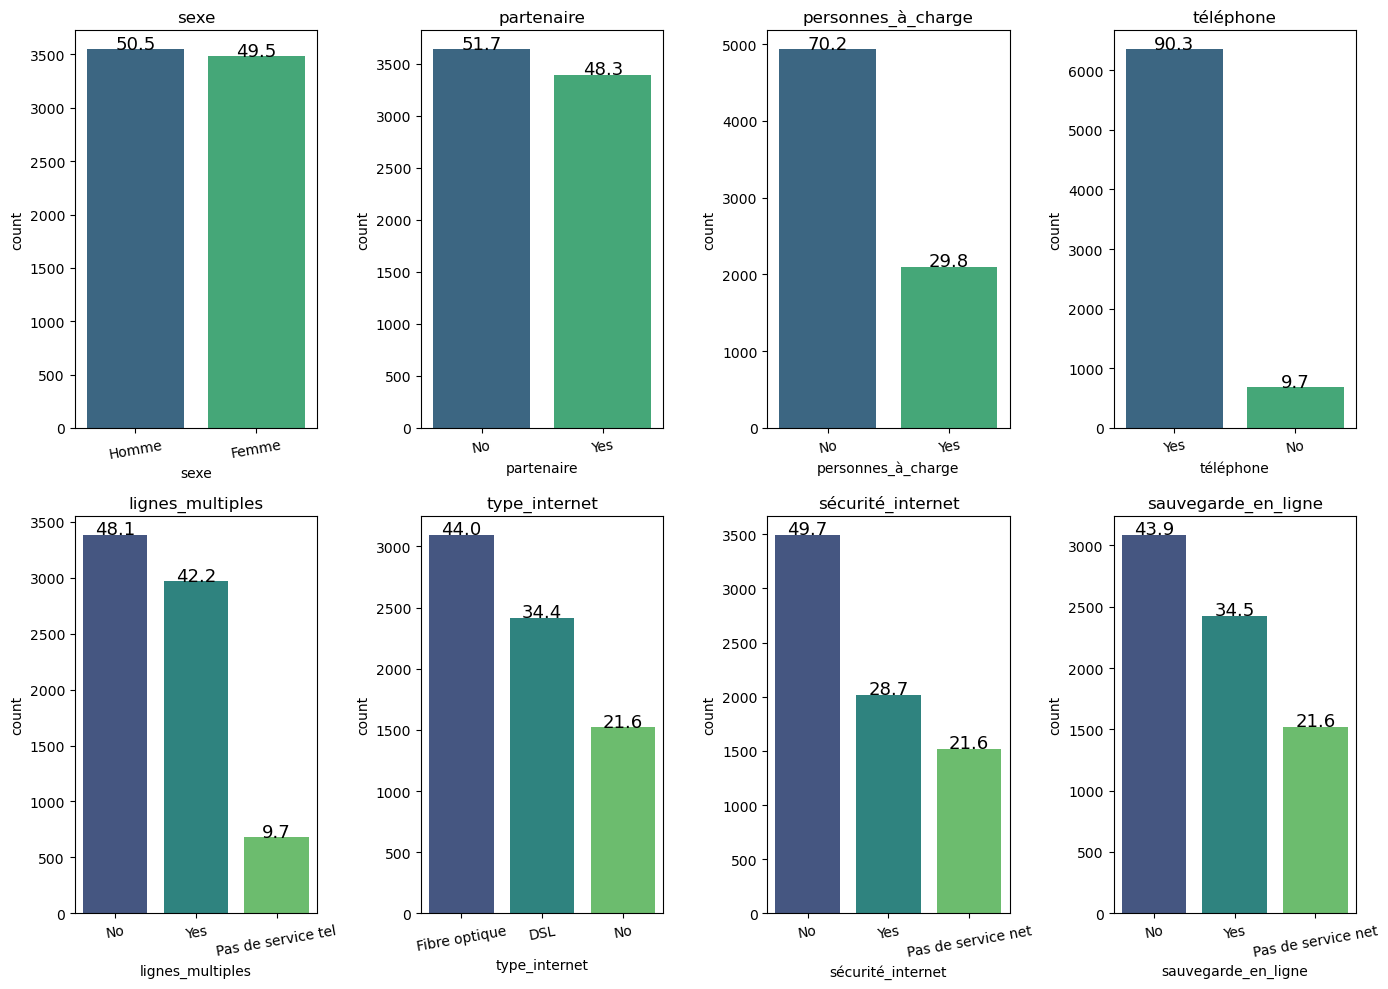

In [19]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[:8]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, palette = 'viridis', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 10)
plt.tight_layout()
plt.show()

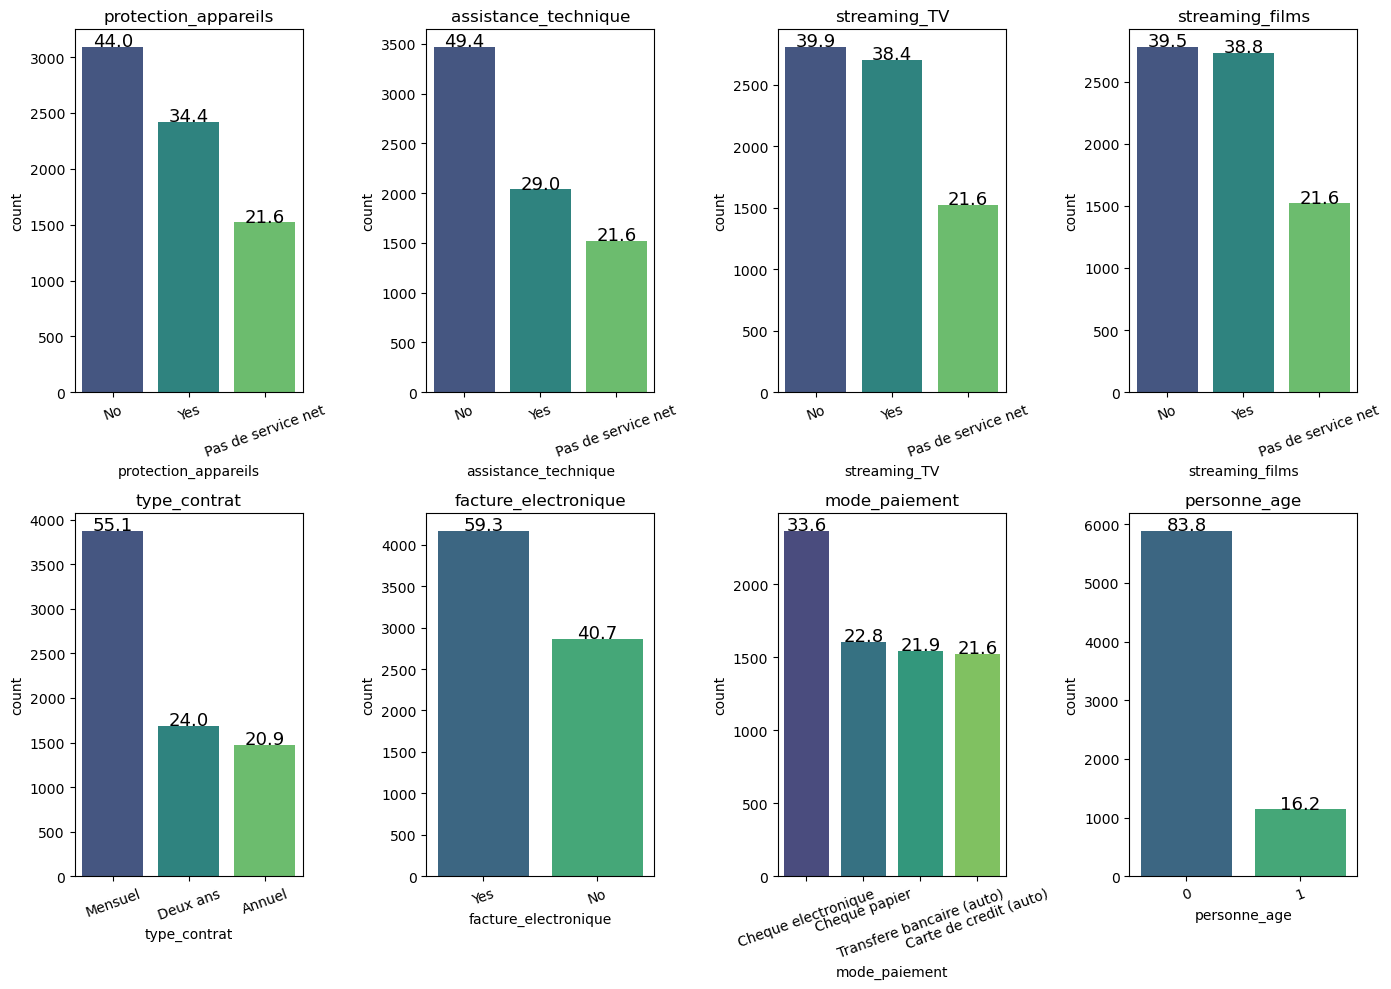

In [20]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[8:]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, palette = 'viridis', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 20)
plt.tight_layout()
plt.show()

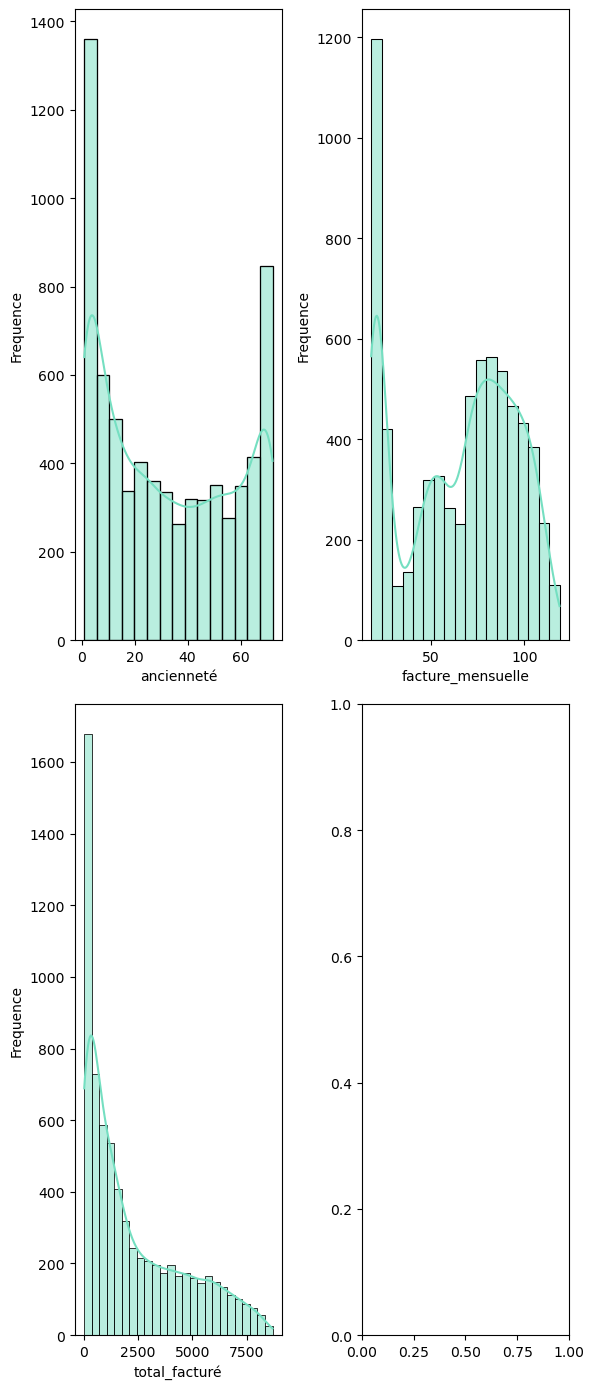

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (6, 14))
axes = axes.flatten()
for ax, col in zip(axes, var_num):
    sns.histplot(data = df[col], ax = ax, kde = True, color = '#75DFC1', edgecolor = 'black' )
    ax.set_xlabel(col)
    ax.set_ylabel('Frequence')
plt.tight_layout()
plt.show()

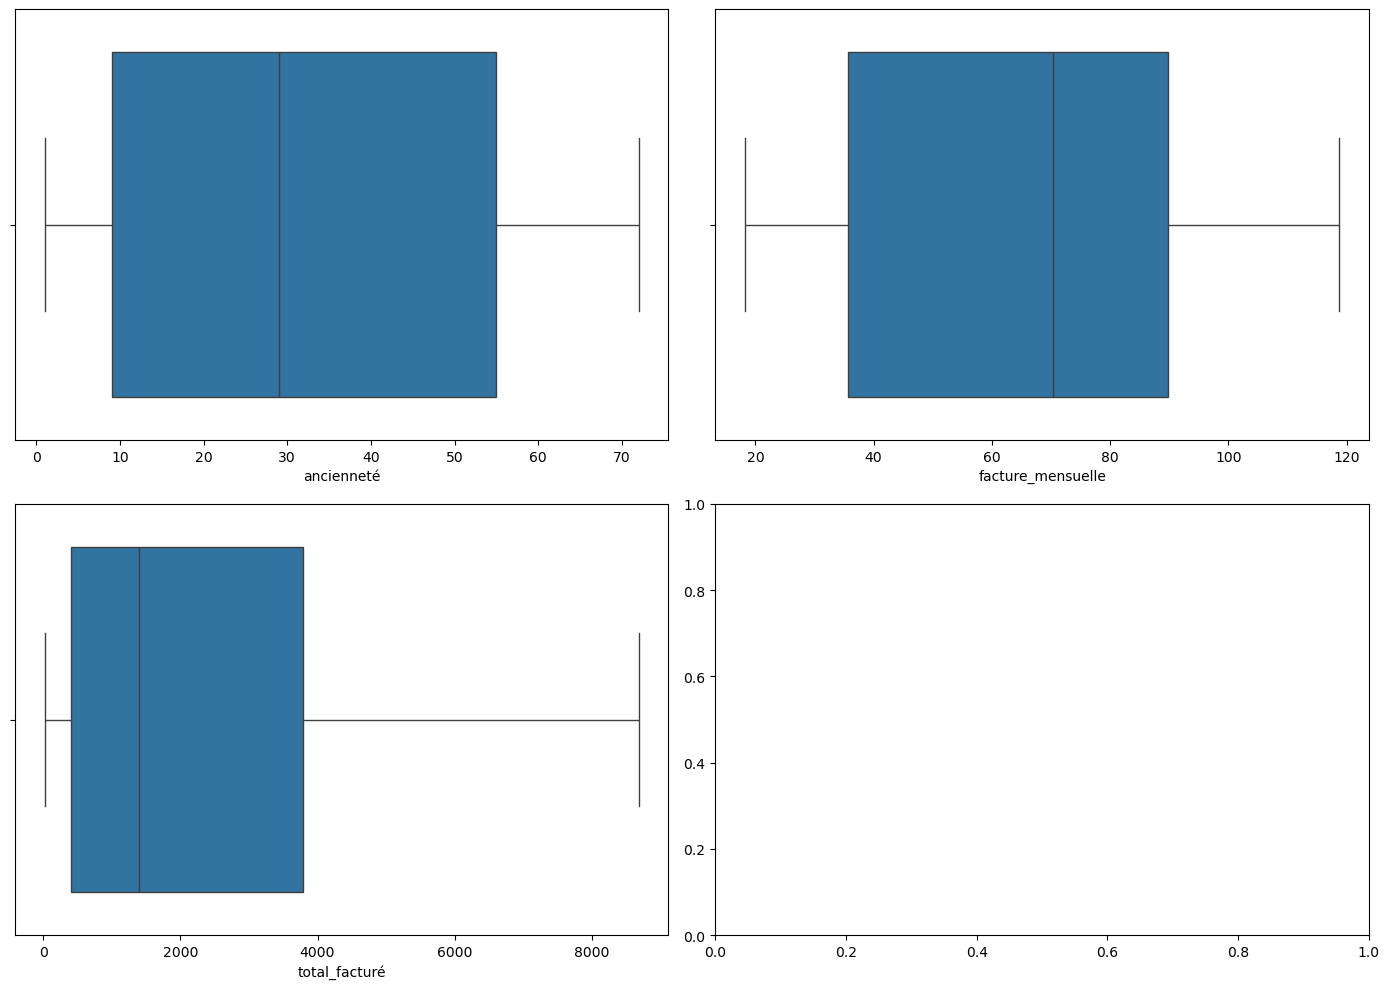

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_num):
    sns.boxplot(data = df, x = col, ax = ax)
plt.tight_layout()
plt.show()

## 3.2. Analyse bivari√©e

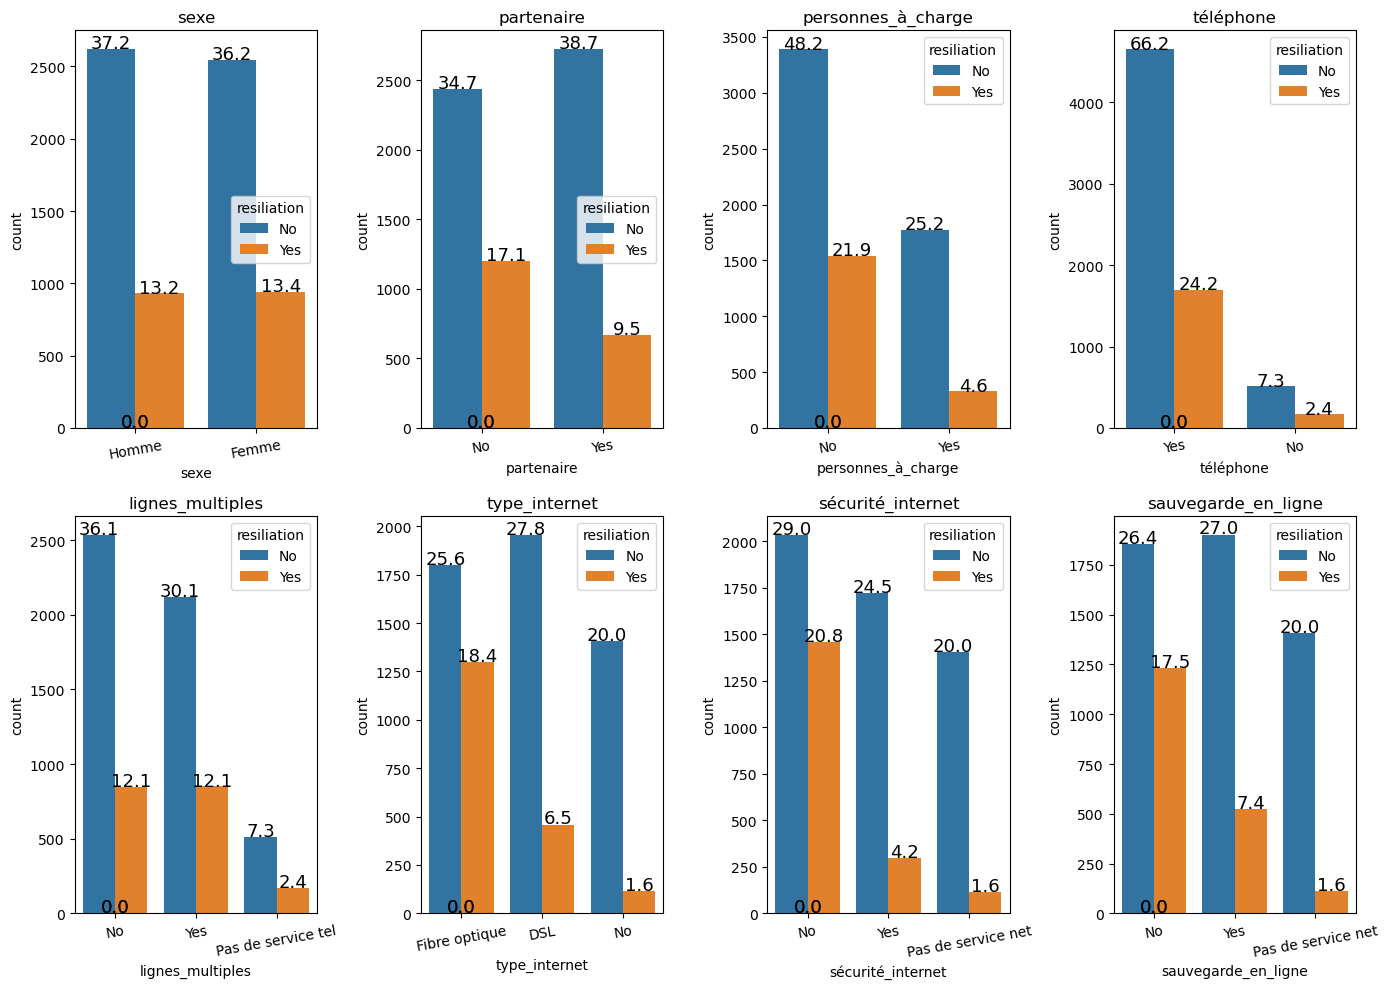

In [23]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[:8]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, hue = 'resiliation', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 10)
plt.tight_layout()
plt.show()

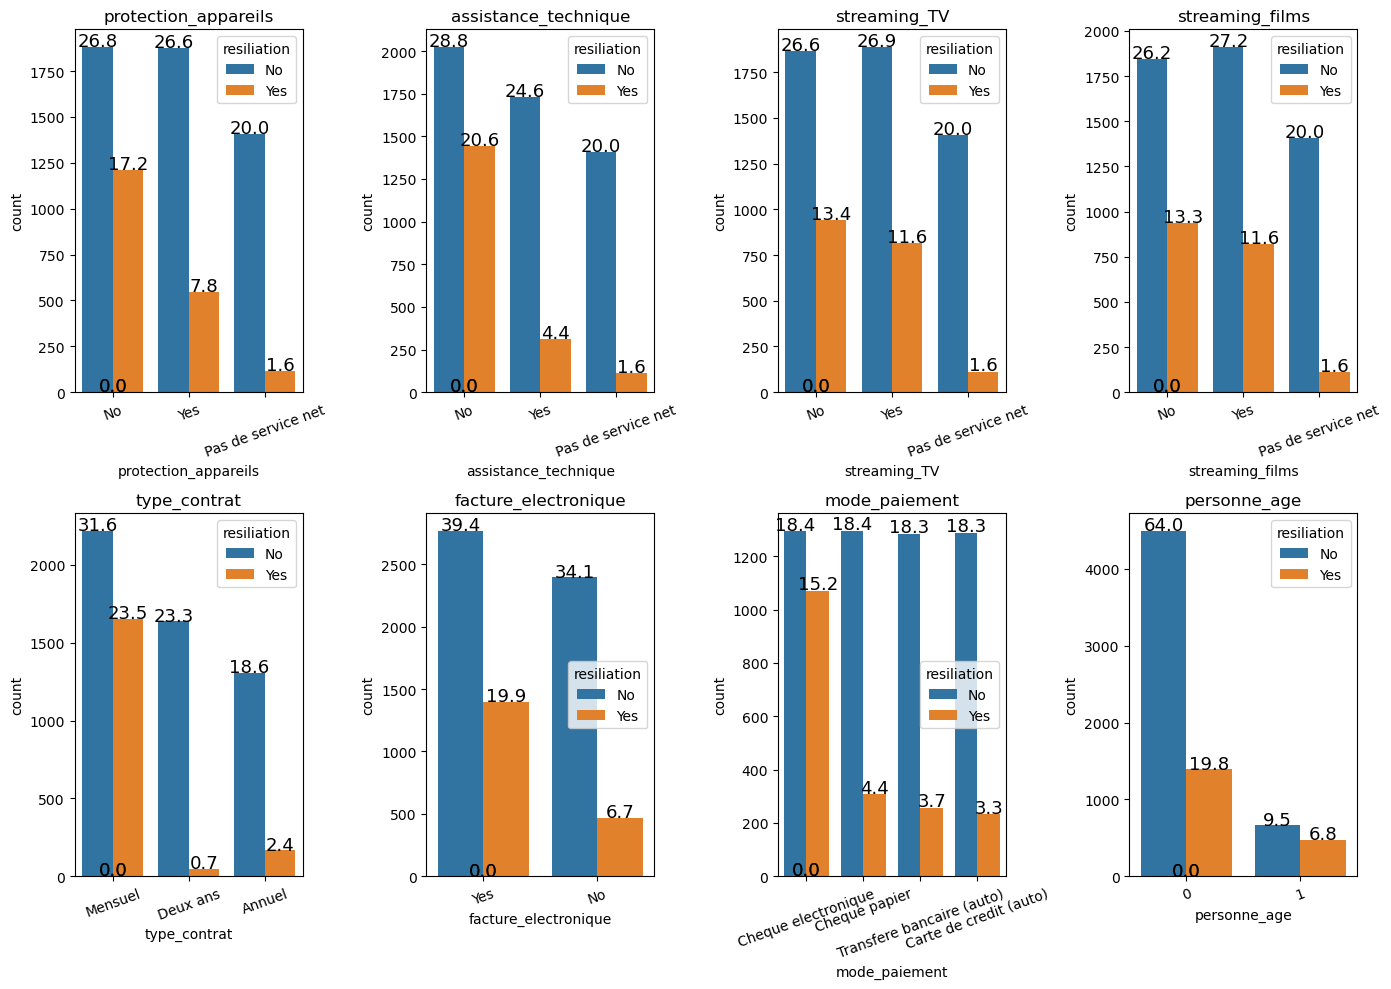

In [24]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[8:]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, hue = 'resiliation', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 20)
plt.tight_layout()
plt.show()

# 4. Preprocessing

In [25]:
df['sexe'].replace({'Femme': 0, 
                    'Homme' : 1}, inplace = True)

df['partenaire'].replace({'No' : 0, 
                          'Yes': 1}, inplace = True)

df['resiliation'].replace({'No' : 0, 
                          'Yes': 1}, inplace = True)

df['personnes_√†_charge'].replace({'No' : 0, 
                          'Yes': 1}, inplace = True)

df['t√©l√©phone'].replace({'No' : 0, 
                         'Yes': 1}, inplace = True)

df['facture_electronique'].replace({'No' : 0, 
                                    'Yes': 1}, inplace = True)

df['type_contrat'].replace({'Mensuel' : 0, 
                            'Annuel': 1, 
                            'Deux ans' : 2}, inplace = True)

df['mode_paiement'].replace({'Cheque electronique' : 0, 
                             'Cheque papier': 1, 
                             'Transfere bancaire (auto)' : 2, 
                             'Carte de credit (auto)' : 3}, inplace = True)

df['lignes_multiples'].replace({'No' : 0, 
                                'Yes': 1, 
                                'Pas de service tel' : 2}, inplace = True)

df['type_internet'].replace({'No' : 0, 
                             'DSL': 1, 
                             'Fibre optique' : 2}, inplace = True)

dct = {'No' : 0, 'Yes': 1, 'Pas de service net' : 2}

for col in ['s√©curit√©_internet', 'sauvegarde_en_ligne', 'protection_appareils', 'assistance_technique', 'streaming_TV', 'streaming_films']:
    df[col].replace(dct, inplace = True)

In [26]:
df.drop('ID', axis = 1, inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sexe                  7032 non-null   int64  
 1   personne_age          7032 non-null   int64  
 2   partenaire            7032 non-null   int64  
 3   personnes_√†_charge    7032 non-null   int64  
 4   anciennet√©            7032 non-null   int64  
 5   t√©l√©phone             7032 non-null   int64  
 6   lignes_multiples      7032 non-null   int64  
 7   type_internet         7032 non-null   int64  
 8   s√©curit√©_internet     7032 non-null   int64  
 9   sauvegarde_en_ligne   7032 non-null   int64  
 10  protection_appareils  7032 non-null   int64  
 11  assistance_technique  7032 non-null   int64  
 12  streaming_TV          7032 non-null   int64  
 13  streaming_films       7032 non-null   int64  
 14  type_contrat          7032 non-null   int64  
 15  facture_electronique

In [28]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
print(df.duplicated().sum())

22
0


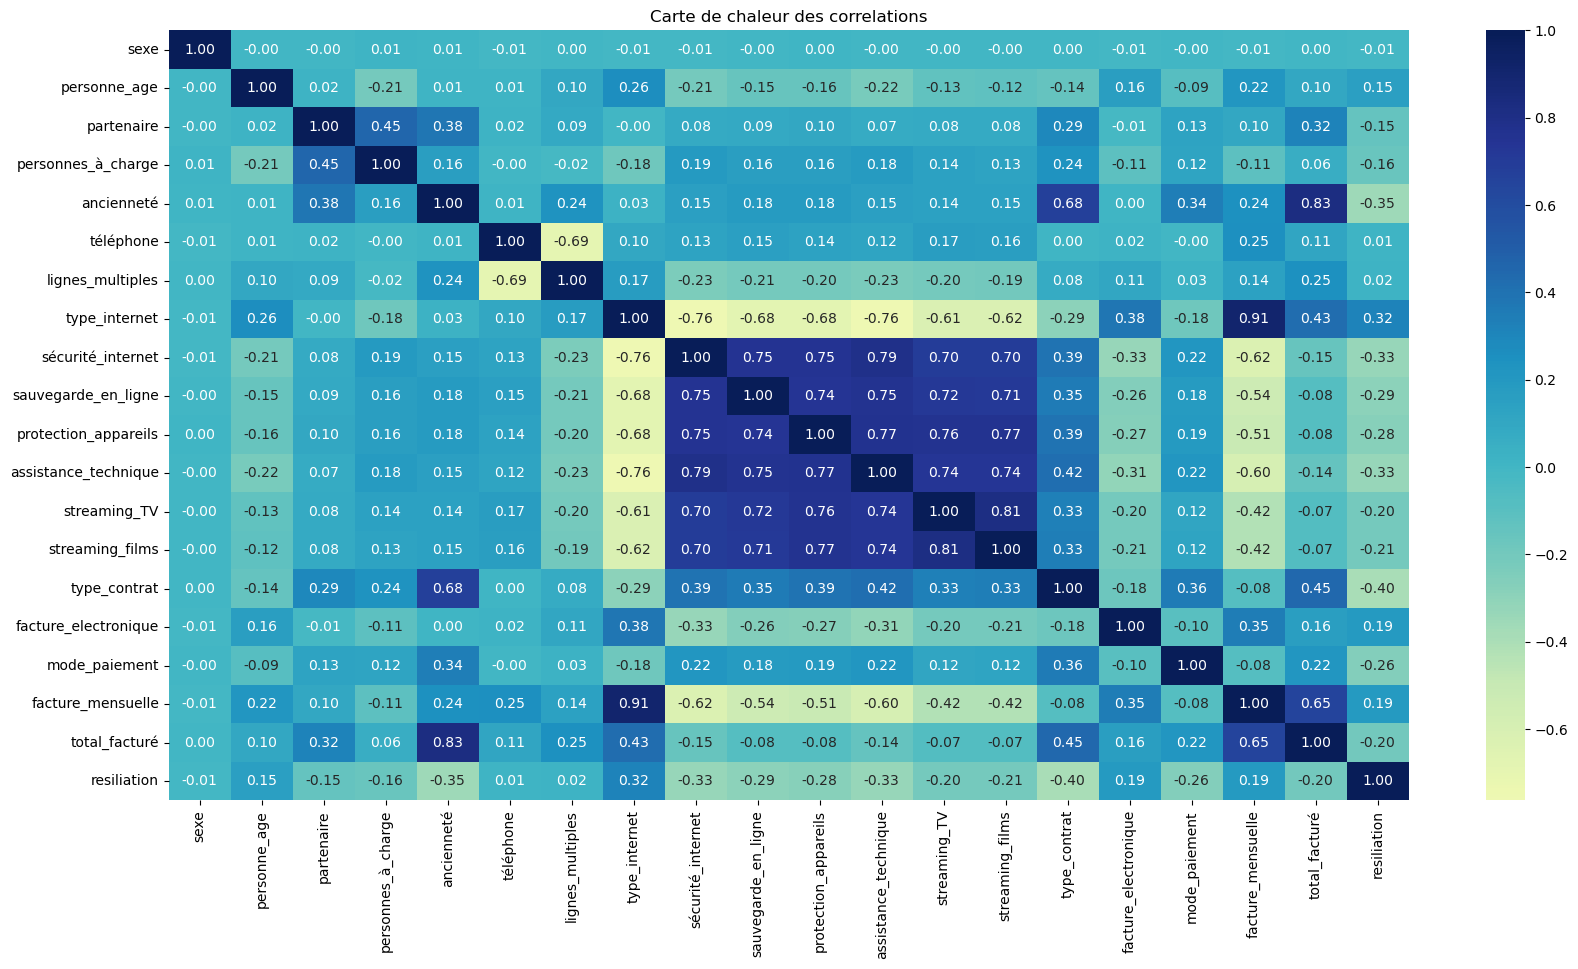

In [29]:
corr_matrix = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'YlGnBu', center = 0)
plt.title('Carte de chaleur des correlations')
plt.show()

# 5. Modelisation 

In [30]:
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
seed = 42

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [32]:
X = df.drop('resiliation', axis = 1)
X_scaled = mm_scaler.fit_transform(X)
y = df['resiliation']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed, stratify = y)

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state = seed)

X_train_down, y_train_down = rus.fit_resample(X_train, y_train)

In [35]:
X_train_down = pd.DataFrame(X_train_down, columns = X.columns)
y_train_down = pd.DataFrame(y_train_down)

In [36]:
y_train_down.value_counts()

resiliation
0              1486
1              1486
Name: count, dtype: int64

In [37]:
def evaluation(model, X_train, y_train):
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 5, 
                                                      scoring = 'f1', train_sizes = np.linspace(0.1, 1,5), n_jobs=-1)
    plt.figure(figsize = (12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
    plt.show()

In [38]:
XGBClassifier = XGBClassifier (n_estimators = 20, random_state = seed)
AdaBoostClassifier = AdaBoostClassifier(n_estimators = 20, random_state = seed)
RandomForestClassifier = RandomForestClassifier(n_estimators = 20, random_state = seed)
DecisionTreeClassifier = DecisionTreeClassifier(random_state = seed)
LogisticRegression = LogisticRegression(random_state = seed)
KNeighborsClassifier = KNeighborsClassifier()
SVC = SVC(random_state = seed)

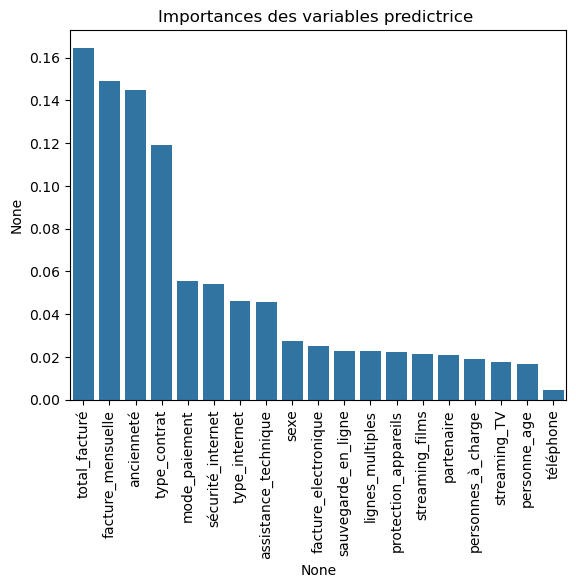

In [39]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
rfc = RandomForestClassifier(random_state = seed)
rfc.fit(X_train_down, y_train_down)
var_imp = pd.Series(rfc.feature_importances_, df.drop('resiliation', axis = 1).columns).sort_values(ascending = False)
sns.barplot(x = var_imp.index, y = var_imp)
plt.xticks(rotation = 90)
plt.xlabel = ('Variables')
plt.ylabel = ('Score')
plt.title('Importances des variables predictrice ')
plt.show()

In [40]:
var_imp

total_factur√©           0.164641
facture_mensuelle       0.148998
anciennet√©              0.145004
type_contrat            0.119095
mode_paiement           0.055675
s√©curit√©_internet       0.054307
type_internet           0.046309
assistance_technique    0.045593
sexe                    0.027265
facture_electronique    0.024921
sauvegarde_en_ligne     0.022938
lignes_multiples        0.022694
protection_appareils    0.022207
streaming_films         0.021536
partenaire              0.020930
personnes_√†_charge      0.019123
streaming_TV            0.017594
personne_age            0.016769
t√©l√©phone               0.004399
dtype: float64

In [41]:
dicts_of_models = {#'XGB':XGBClassifier, 
                   #'AdaBoostClassifier':AdaBoostClassifier, 
                   #'RandomForestClassifier':RandomForestClassifier, 
                   #'DecisionTreeClassifier':DecisionTreeClassifier, 
                   'LogisticRegression':LogisticRegression,
                   #'KNeighborsClassifier':KNeighborsClassifier, 
                   #'SVC':SVC
                   }

LogisticRegression
[[749 282]
 [ 76 295]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1031
           1       0.51      0.80      0.62       371

    accuracy                           0.74      1402
   macro avg       0.71      0.76      0.71      1402
weighted avg       0.80      0.74      0.76      1402



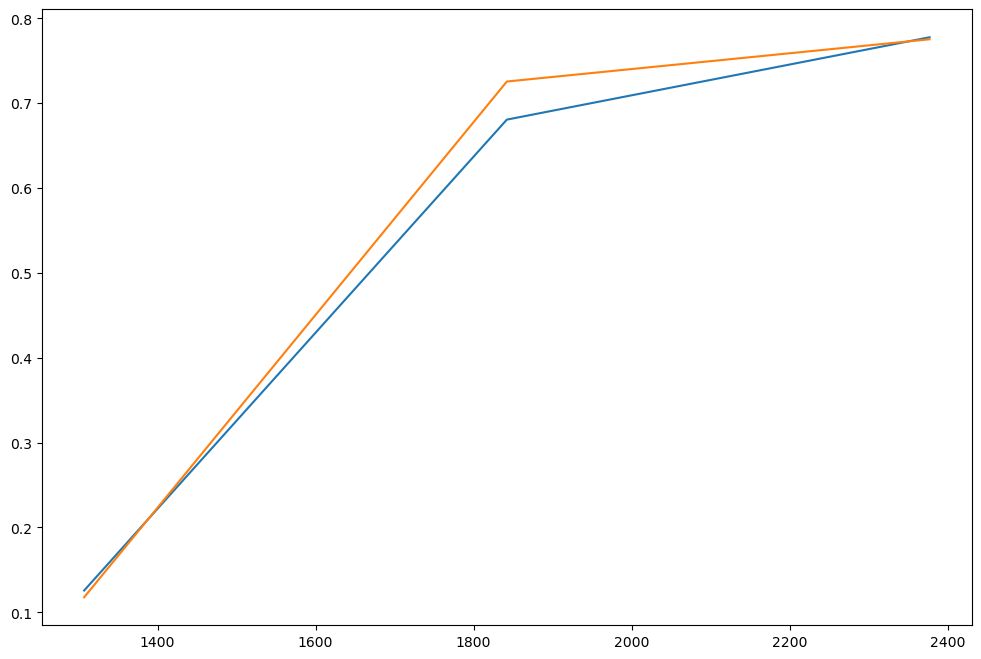

In [42]:
for name, model in dicts_of_models.items():
    print(name)
    evaluation(model, X_train_down, y_train_down)

# 6. Optimisation

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = seed, class_weight = 'balanced')

In [44]:
param_grid = {'C' : [0.01, 0.1, 1, 10],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'max_iter': [100, 500, 1000],
             'solver': ['saga'],
              'l1_ratio' : [0, 0.5, 1]}
grid_search = GridSearchCV(estimator = lr,
                          param_grid = param_grid,
                          scoring = 'f1',
                          cv = 5,
                          )

grid_search.fit(X_train_down, y_train_down)
print('Meilleur score CV:', grid_search.best_score_)
print('Meilleur parametre:', grid_search.best_params_)

model_grid = grid_search.best_estimator_

Meilleur score CV: 0.7787110244624137
Meilleur parametre: {'C': 10, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


[[754 277]
 [ 77 294]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1031
           1       0.51      0.79      0.62       371

    accuracy                           0.75      1402
   macro avg       0.71      0.76      0.72      1402
weighted avg       0.80      0.75      0.76      1402



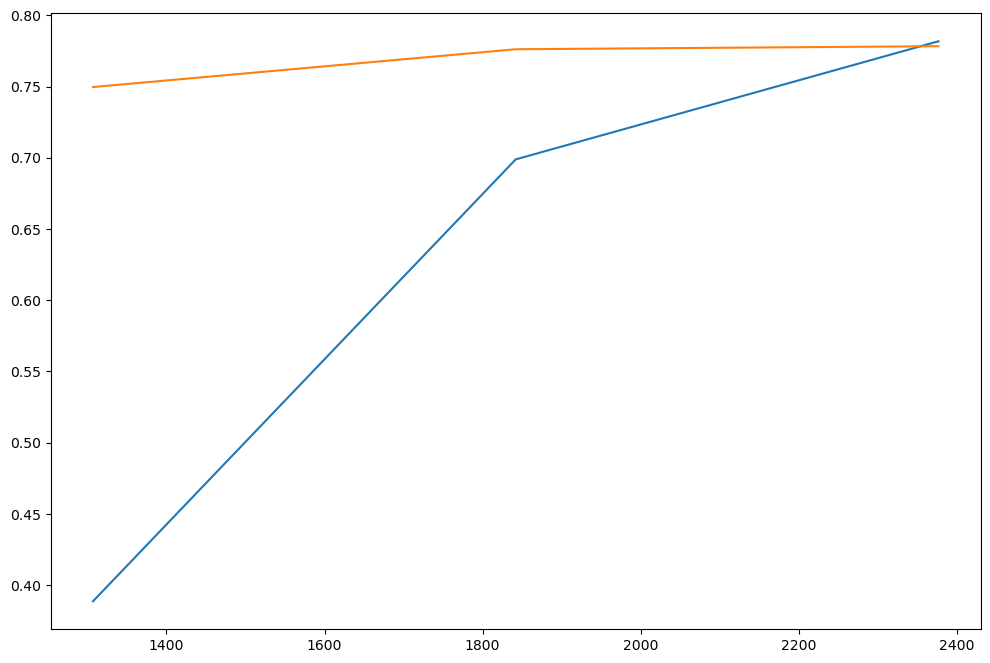

In [45]:
evaluation(model_grid, X_train_down, y_train_down)

In [46]:
def model_with_rfe(model, X_train, y_train):
    rfe_model = RFE(estimator = model, verbose=0)
    rfe_model.fit(X_train, y_train)
    mask = rfe_model.support_
    reduced_X = X_train.loc[:, mask]
    print(reduced_X.columns)
    return rfe_model

In [47]:
log_reg = LogisticRegression(random_state=seed)

In [48]:
rfe_log_reg = model_with_rfe(log_reg, X_train_down, y_train_down)

Index(['anciennet√©', 'lignes_multiples', 'type_internet', 's√©curit√©_internet',
       'assistance_technique', 'streaming_TV', 'streaming_films',
       'type_contrat', 'total_factur√©'],
      dtype='object')


[[752 279]
 [ 80 291]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1031
           1       0.51      0.78      0.62       371

    accuracy                           0.74      1402
   macro avg       0.71      0.76      0.71      1402
weighted avg       0.80      0.74      0.76      1402



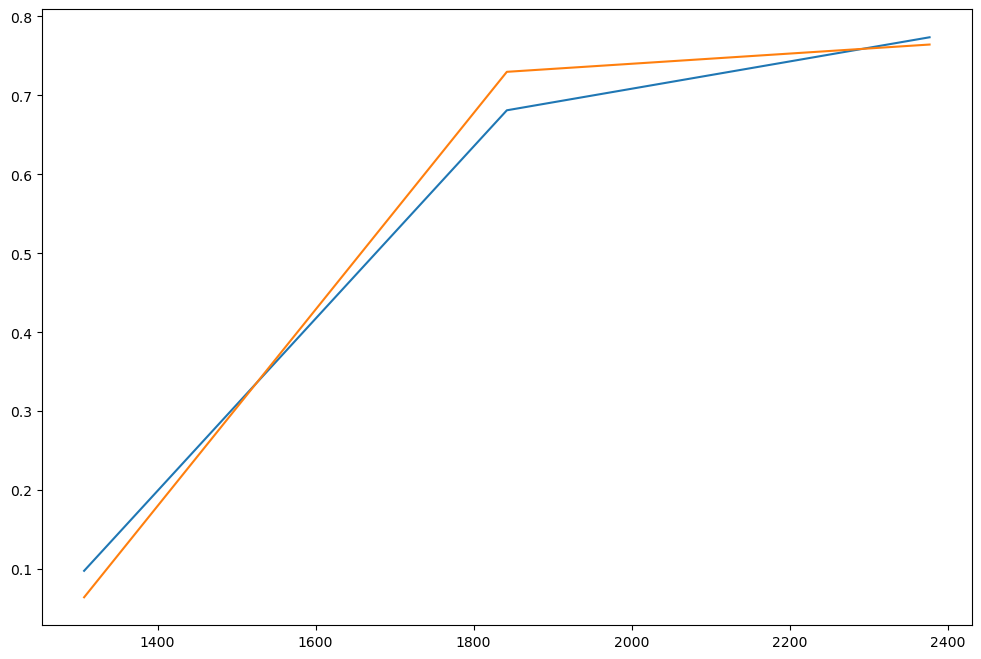

In [49]:
evaluation(rfe_log_reg, X_train_down, y_train_down)

Apres toute modification, on retient que le meilleurs model est le model de Regression Logistique sans GridSearch CV, et sans RFE

In [50]:
model_final = LogisticRegression

In [51]:
import joblib
joblib.dump(value = model_final, filename = 'Telco_Customer_Churn')

['Telco_Customer_Churn']

# 7. Conclusion

### üìä **√âvaluation du mod√®le de pr√©diction de la r√©siliation client**

Dans ce projet, nous avons d√©velopp√© un mod√®le visant √† **pr√©dire la r√©siliation de clients (churn)** √† partir du jeu de donn√©es **Telco Customer Churn**. L‚Äôobjectif principal est d‚Äôidentifier les abonn√©s les plus susceptibles de rompre leur contrat, afin de permettre √† l‚Äôentreprise de mener des actions pr√©ventives cibl√©es.

Apr√®s l‚Äôexploration de plusieurs approches, le **mod√®le de r√©gression logistique** a √©t√© retenu pour sa **simplicit√©, sa rapidit√© d'ex√©cution et sa capacit√© d'interpr√©tation**. Il affiche un **F1-score moyen pond√©r√© de 0.76**, avec un **rappel de 0.80** sur la classe minoritaire (les clients ayant effectivement r√©sili√©), ce qui est essentiel dans une probl√©matique o√π le co√ªt d‚Äôun faux n√©gatif est √©lev√©.

---

### ‚öôÔ∏è **M√©thodologie adopt√©e**

* Afin de **g√©rer le d√©s√©quilibre des classes**, nous avons appliqu√© la technique de **RandomUnderSampler**. Cela a permis d‚Äô√©quilibrer les effectifs entre les clients churn et non churn, et ainsi de **mieux former le mod√®le sur la classe minoritaire** sans biaiser l‚Äôapprentissage.
* Une **optimisation par GridSearchCV** a √©t√© conduite sur les hyperparam√®tres cl√©s (`C`, `penalty`, `solver`, `class_weight`). Cependant, les gains en performance sont rest√©s **marginaux**, indiquant une **stabilit√© du mod√®le** d√®s sa configuration de base.
* Une tentative de **s√©lection de variables par RFE (Recursive Feature Elimination)** a √©galement √©t√© r√©alis√©e. Les r√©sultats obtenus **n'ont pas permis d‚Äôam√©liorer la performance du mod√®le**, ce qui confirme que l'ensemble des variables initiales retenues √©taient d√©j√† informatives.

---

### ‚úÖ **Pourquoi ce mod√®le est adapt√© √† notre probl√®me**

* **Lisible et explicable** : Les coefficients de la r√©gression permettent de **comprendre les facteurs influen√ßant la r√©siliation**.
* **Rapide √† entra√Æner et √† d√©ployer**, ce qui le rend id√©al pour une int√©gration dans un outil m√©tier.
* Gr√¢ce √† `class_weight='balanced'` et √† l‚Äôapplication du **RandomUnderSampler**, le mod√®le reste **performant m√™me sur une classe minoritaire**.

---

### ‚ö†Ô∏è **Limites et perspectives**

* Malgr√© l‚Äôoptimisation des hyperparam√®tres et la s√©lection de variables, **les performances n‚Äôont pas significativement √©volu√©**, ce qui sugg√®re que **la r√©gression logistique atteint rapidement ses limites** sur ce jeu de donn√©es.
* Le **taux d‚Äôerreurs sur les clients r√©ellement en churn (faux n√©gatifs)** peut avoir un **impact m√©tier direct**, car il risque de laisser passer des clients √† risque sans d√©clencher d‚Äôactions pr√©ventives.

---

### üíº **Impact m√©tier**

* Ce mod√®le peut √™tre **int√©gr√© dans un tableau de bord de scoring clients**, afin de **prioriser les campagnes de r√©tention**.
* Il permet aux √©quipes de cibler les clients les plus √† risque, avec **un score facilement interpr√©table**.
* Il constitue une **premi√®re brique op√©rationnelle**, fiable, sur laquelle on pourra s‚Äôappuyer pour tester √† l‚Äôavenir des mod√®les plus complexes (arbre de d√©cision, XGBoost, etc.).
